# Trabalho 2

* Aluno : Gabriel Borin Macedo
* RA : 197201

## Descrição do trabalho

## Parte 0 : criação de função úteis para o programa

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from glob import glob


def read_images(images_path: list[str]) -> tuple[list, list]:
    gray_images_vec = []
    rgb_images_vec = []

    for img_path in images_path:
        img_gray = cv2.imread(img_path, 0)

        # Estamos lendo a imagem em BGR e depois convertendo para RGB
        img_rgb = cv2.imread(img_path)[..., ::-1]

        gray_images_vec.append(img_gray)
        rgb_images_vec.append(img_rgb)

    return gray_images_vec, rgb_images_vec


def plot_figures_in_line(image_rgb: np.ndarray, gray_img: np.ndarray, title1: str = "",
                         title2: str = "", **kwargs: dict) -> None:
    """

    Args:
        image_rgb:
        gray_img:
        title1:
        title2:
        **kwargs:

    Returns:

    """

    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    if "figsize" in kwargs.keys():
        figsize_val = kwargs.pop("figsize")

    else:
        figsize_val = (15, 15)

    fig, ax = plt.subplots(1, 2, figsize=figsize_val)

    # Plot da imagem rgb
    ax[0].imshow(image_rgb, vmin=image_rgb.min(), vmax=image_rgb.max())
    ax[0].set_title(title1)

    # Plot da imagem em tom de cinza
    ax[1].imshow(gray_img, vmin=gray_img.min(), vmax=gray_img.max())
    ax[1].set_title(title2)

    for a in ax:
        a.axis('off')
    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()

In [2]:
image_files_path = sorted(glob("Imagens/*"))
gray_images, rgb_images = read_images(image_files_path)

libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50


Nome da imagem de entrada : Imagens/objetos1.png
(327, 563)
(327, 563, 3)


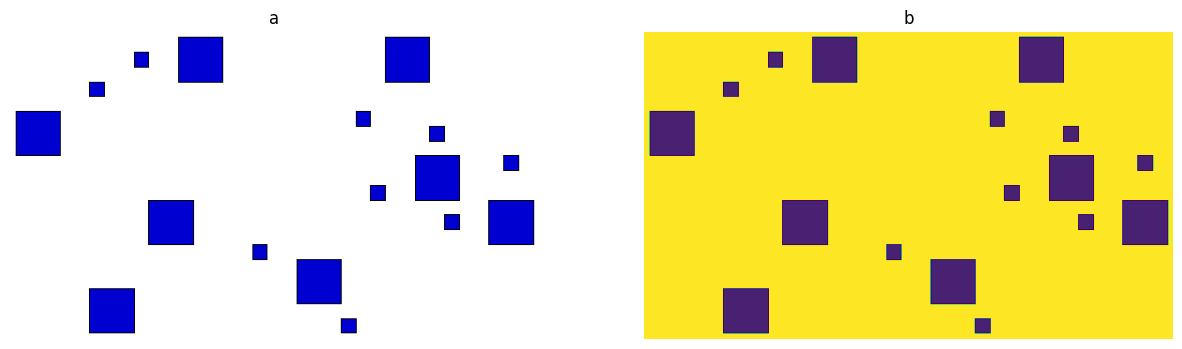

Nome da imagem de entrada : Imagens/objetos2.png
(343, 563)
(343, 563, 3)


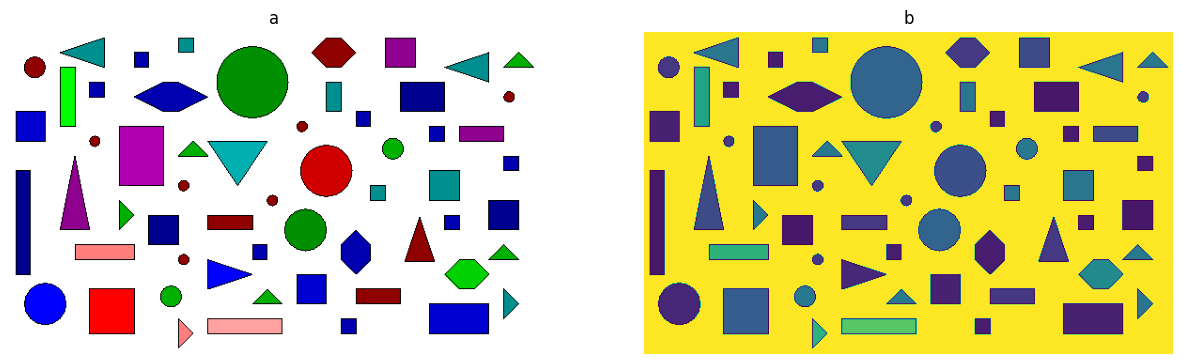

Nome da imagem de entrada : Imagens/objetos3.png
(238, 238)
(238, 238, 3)


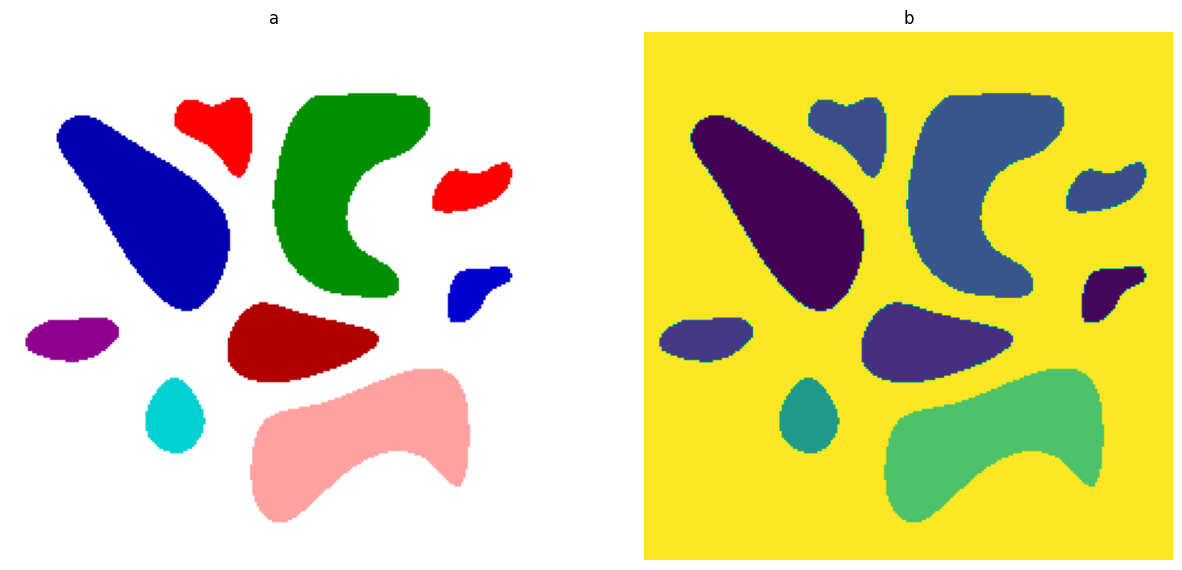

In [3]:
for gray_img, rgb_img, image_name in zip(gray_images, rgb_images, image_files_path):
    print("Nome da imagem de entrada : {}".format(image_name))
    print(gray_img.shape)
    print(rgb_img.shape)
    plot_figures_in_line(rgb_img, gray_img, "a", "b")